In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [42]:
!pwd

/content


In [43]:
import os
import zipfile
import re

# Un zip and define training data (sample because of colab restrictions)
with zipfile.ZipFile('train_sample.zip', 'r') as zip_ref:
    zip_ref.extractall('training')

# training directory
training_directory = './training'

# Define the regular expression pattern for the file names
pattern = r'_([A-Z]{2})-'

# Load the training data
train_images = []
train_labels = []
for image_file in os.listdir(training_directory):
    if image_file.endswith('.jpg'):
        image_path = os.path.join(training_directory, image_file)
        lang = re.search(pattern, image_file).group(1)
        train_images.append(image_path)
        train_labels.append(lang)

# validation directory 
validation_directory = './validation_real'

# Load the validation data
val_images = []
val_labels = []
for image_file in os.listdir(validation_directory):
    if image_file.endswith('.jpg'):
        image_path = os.path.join(validation_directory, image_file)
        lang = re.search(pattern, image_file).group(1)
        val_images.append(image_path)
        val_labels.append(lang)


In [44]:
from PIL import Image

# Define the target image size
image_size = (128, 128)  

# Preprocess the training images
train_images_preprocessed = []
for image_path in train_images:
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize(image_size)  # Resize
    image = np.array(image) / 255.0  # Normalize pixel values
    train_images_preprocessed.append(image)

# Preprocess the validation images
val_images_preprocessed = []
for image_path in val_images:
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize(image_size)  # Resize
    image = np.array(image) / 255.0  # Normalize pixel values
    val_images_preprocessed.append(image)

In [45]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding for training labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Perform label encoding for validation labels
val_labels_encoded = label_encoder.transform(val_labels)

In [46]:
num_classes = 5

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 57600)             0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [47]:
# Convert the preprocessed data to NumPy arrays
train_images_preprocessed = np.array(train_images_preprocessed)
val_images_preprocessed = np.array(val_images_preprocessed)

# Add a channel dimension to the image data
train_images_preprocessed = np.expand_dims(train_images_preprocessed, axis=-1)
val_images_preprocessed = np.expand_dims(val_images_preprocessed, axis=-1)

# Train the model
history = model.fit(train_images_preprocessed, train_labels_encoded, epochs=10, batch_size=32, validation_data=(val_images_preprocessed, val_labels_encoded))


Epoch 1/10
249/249 [==============================] - 281s 1s/step - loss: 0.6612 - accuracy: 0.7653 - val_loss: 0.3222 - val_accuracy: 0.8976
Epoch 2/10
249/249 [==============================] - 279s 1s/step - loss: 0.2705 - accuracy: 0.9062 - val_loss: 0.2944 - val_accuracy: 0.8966
Epoch 3/10
249/249 [==============================] - 278s 1s/step - loss: 0.2289 - accuracy: 0.9185 - val_loss: 0.2346 - val_accuracy: 0.9179
Epoch 4/10
249/249 [==============================] - 278s 1s/step - loss: 0.2025 - accuracy: 0.9275 - val_loss: 0.2483 - val_accuracy: 0.9140
Epoch 5/10
249/249 [==============================] - 279s 1s/step - loss: 0.1681 - accuracy: 0.9370 - val_loss: 0.2021 - val_accuracy: 0.9285
Epoch 6/10
249/249 [==============================] - 290s 1s/step - loss: 0.1400 - accuracy: 0.9485 - val_loss: 0.2053 - val_accuracy: 0.9280
Epoch 7/10
249/249 [==============================] - 251s 1s/step - loss: 0.1130 - accuracy: 0.9588 - val_loss: 0.1910 - val_accuracy: 0.9350

In [48]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_images_preprocessed, val_labels_encoded)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Optionally, evaluate the model on test data
# test_images_preprocessed = ...  # Preprocess the test images similarly to training and validation data
# test_labels_encoded = ...  # Encode the test labels similarly to training and validation labels
# test_loss, test_accuracy = model.evaluate(test_images_preprocessed, test_labels_encoded)
# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_accuracy)


249/249 [==============================] - 52s 209ms/step - loss: 0.2120 - accuracy: 0.9351


KeyboardInterrupt: ignored

In [49]:
model.summary()

# Print the model parameters
model_params = model.count_params()
print("Total Model Parameters:", model_params)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 57600)             0         
                                                                 
 dense_8 (Dense)             (None, 64)               

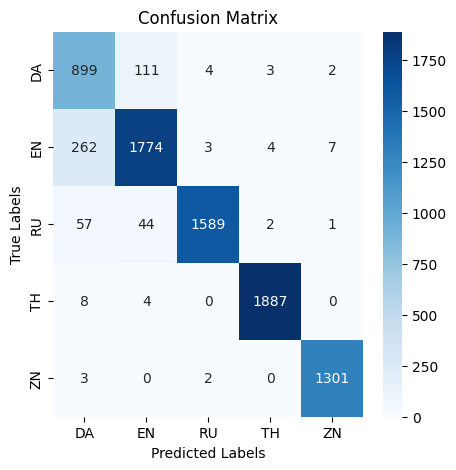

In [52]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the validation data
val_predictions = model.predict(val_images_preprocessed)
val_predictions_encoded = np.argmax(val_predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(val_labels_encoded, val_predictions_encoded)

# Get class labels from the label encoder
class_labels = label_encoder.classes_

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Data Preparation:
To begin libaries such as numpy, pandas, tensorflow, and keras, are imported. Modules for file handling and image processing are included. The training data is stored in a zip file named 'train_sample.zip,' which is extracted into a directory called 'training.' I had to take a sample of the dataset to get this to work on google colab. A regular expression pattern is defined to extract language labels from the image file names.

Loading Training and Validation Data:
The code iterates through the training and validation datasets and reads the .jpg files, and extracts the language labels with regex. The image paths and corresponding labels are stored in separate lists.

Preprocessing Images:
To prepare the training and validation images for the CNN model, the PIL library is used. The images are converted to grayscale (just in case), resized to a target size of 128x128 pixels (in order to avoid memory issues on colab), and normalized by dividing the pixel values by 255.0 to scale them between 0 and 1. The preprocessed images are stored in separate lists.

Label Encoding:
Label encoding from sklearn is used on the training and validation labels. This encoding assigns unique integer values to each language based on their occurrence in the dataset.

Model Architecture:
The NN model is defined using the Keras Sequential API. It consists of two convolutional layers with ReLU activation, followed by max pooling layers for downsampling. The output is then flattened and passed through two fully connected (dense) layers with ReLU activation. The final output layer uses the softmax activation function to obtain class probabilities.

Data Preparation for Training:
The image data vectors are converted to NumPy arrays.

Model Training:
Overall training seems to be a success. The runtime was relatively slow on google colab. An input size of 128x128 with 10 epochs took about 45 minutes to run but the accurcy was almost 93 percent. 

Model Evaluation:
The model was somewhat accurate given the limitations of the dataset. There were almsot the same amount of values in the training vs validation becuase of the limitations of colab but overall the model was impressive given the scale. There were about 3,700,000 parameters in the model. It seems that distinguishing english and danish was the most difficult for the model. 

